In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/skin_Cancer.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/benign/420.jpg  
  inflating: data/train/benign/421.jpg  
  inflating: data/train/benign/422.jpg  
  inflating: data/train/benign/423.jpg  
  inflating: data/train/benign/424.jpg  
  inflating: data/train/benign/425.jpg  
  inflating: data/train/benign/426.jpg  
  inflating: data/train/benign/429.jpg  
  inflating: data/train/benign/43.jpg  
  inflating: data/train/benign/430.jpg  
  inflating: data/train/benign/431.jpg  
  inflating: data/train/benign/432.jpg  
  inflating: data/train/benign/434.jpg  
  inflating: data/train/benign/435.jpg  
  inflating: data/train/benign/438.jpg  
  inflating: data/train/benign/439.jpg  
  inflating: data/train/benign/440.jpg  
  inflating: data/train/benign/441.jpg  
  inflating: data/train/benign/442.jpg  
  inflating: data/train/benign/443.jpg  
  inflating: data/train/benign/445.jpg  
  inflating: data/train/benign/446.jpg  
  inflating: data/train/benign/447.jpg  
  infla

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
# import os

num_classes = 1
img_rows, img_cols = 64,64

batch_size = 16

from keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/drive/MyDrive/skincancer002/train'
validation_data_dir = '/content/drive/MyDrive/skincancer002/test'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(64, 64),
        batch_size= 16,
        class_mode='binary',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(64, 64),
        batch_size= 16,
        class_mode='binary',
        shuffle=False)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [ ]:
model = Sequential()
# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
#activation function is to introduce non-linearity into the output of a neuron.
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape= (64, 64, 3),activation = 'relu'))


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# model.add(Conv2D(128, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Cov2D(128, (3, 3)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  

model.add(Flatten())
model.add(Dense(512,kernel_regularizer = l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))   

model.add(Dense(units = 512,activation = 'relu')) 
# model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
# model.add(Dense(units = 81, activation = 'relu'))
# model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
# model.add(Dense(units = 8, activation = 'relu'))
# model.add(Dense(units = 2, activation = 'relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))



print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_15 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
activation_16 (Activation)   (None, 31, 31, 64)       

In [ ]:
# initiate RMSprop optimizer and configure some parameters
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
from keras.optimizers import RMSprop, SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                      
checkpoint = ModelCheckpoint("/content/drive/MyDrive/carcinoma.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
                                    
    
earlystop = EarlyStopping(monitor = 'val_loss', #value being monitored for improvement
                          min_delta = 0.001,  #Abs value and is the main change required before we stop
                          patience = 3, #no of epocs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True) #keep the best weigts once stopped

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 2637
nb_validation_samples = 660
epochs = 25

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 2637 // 16,
    epochs = 25,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps =  660 // 16)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
164/164 [==============================] - 78s 462ms/step - loss: 2.5621 - accuracy: 0.5183 - val_loss: 0.6242 - val_accuracy: 0.6966

Epoch 00001: val_loss improved from inf to 0.62418, saving model to /content/drive/MyDrive/carcinoma.h5
Epoch 2/25
164/164 [==============================] - 76s 463ms/step - loss: 0.6248 - accuracy: 0.7176 - val_loss: 0.5131 - val_accuracy: 0.7729

Epoch 00002: val_loss improved from 0.62418 to 0.51306, saving model to /content/drive/MyDrive/carcinoma.h5
Epoch 3/25
164/164 [==============================] - 76s 463ms/step - loss: 0.5738 - accuracy: 0.7645 - val_loss: 0.5669 - val_accuracy: 0.7210

Epoch 00003: val_loss did not improve from 0.51306
Epoch 4/25
164/164 [==============================] - 75s 455ms/step - loss: 0.5339 - accuracy: 0.7783 - val_loss: 0.5137 - val_accuracy: 0.7607

Epoch 00004: val_loss did not improve from 0.51306
Epoch 5/25
164/164 [==============================] - 75s 457ms/step - loss: 0.4985 - accuracy: 0.7845

In [ ]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

Text(0.5, 0, 'epoch')

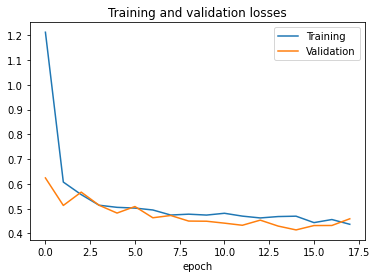

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

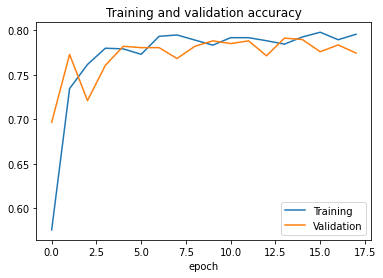

In [ ]:
#plot graph between training and validation accuarcy
#plot graph between training and validation loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.models import load_model

classifier = load_model('/content/drive/MyDrive/carcinoma.h5')
test_image = image.load_img('/content/drive/MyDrive/skincancer002/test/malignant/1058.jpg',target_size = (64,64))


test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)
# result = [[0 ]]

if result[0][0]==0:
    prediction = 'benign'
    print(prediction)
elif result[0][0]==1:
    prediction='malignant'
    print(prediction)

benign


In [ ]:
# Displaying our Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib
#Confution Matrix and Classification Report

class_labels = {0:"benign",1:"malignant"}
Y_pred = classifier.predict_generator(validation_generator, nb_validation_samples // batch_size+1) # put classifier not model
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))



/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[360   0]
 [300   0]]
Classification Report
              precision    recall  f1-score   support

      benign       0.55      1.00      0.71       360
   malignant       0.00      0.00      0.00       300

    accuracy                           0.55       660
   macro avg       0.27      0.50      0.35       660
weighted avg       0.30      0.55      0.39       660



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


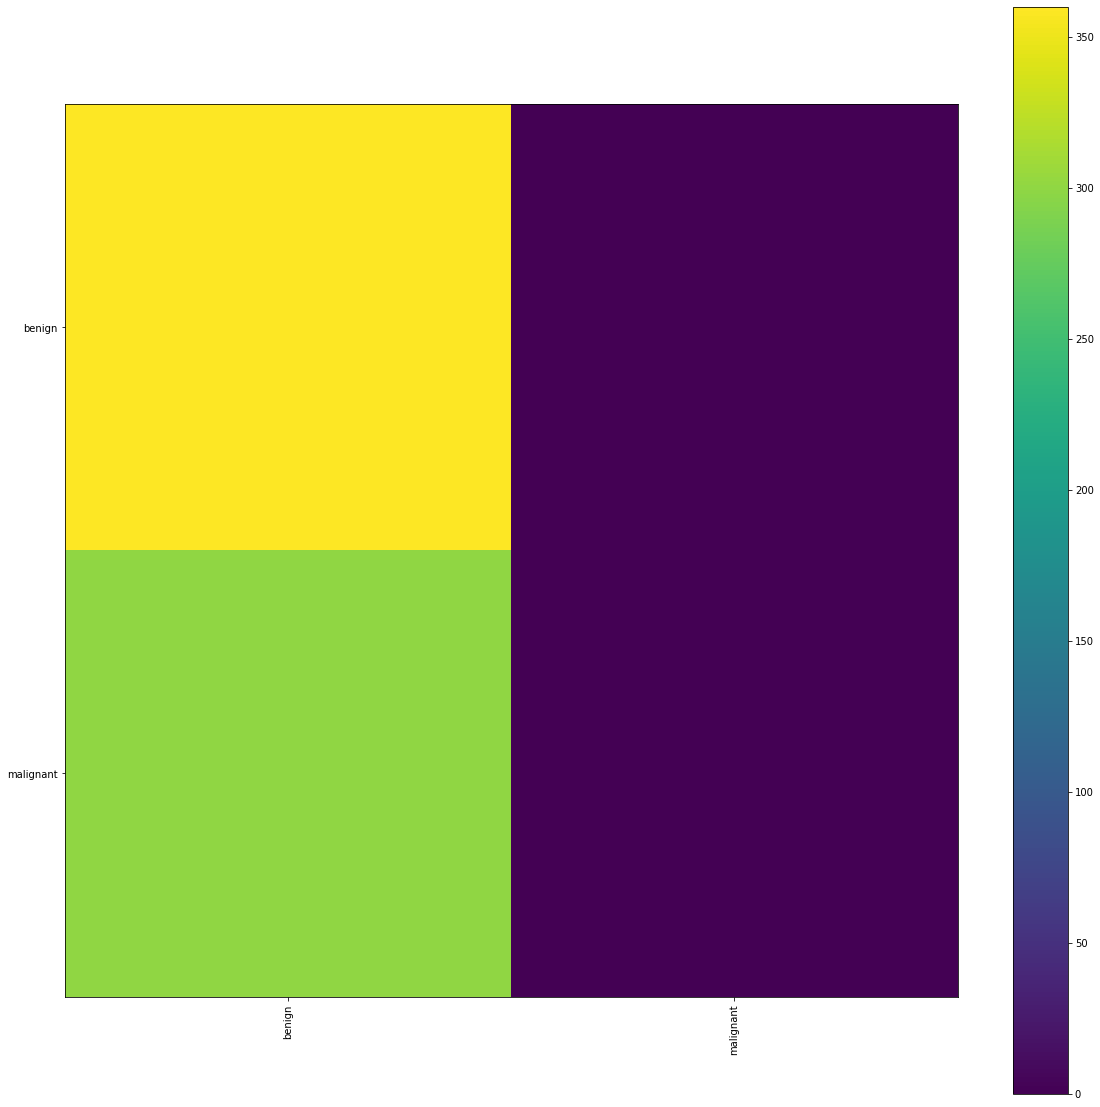

In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 64,64,3
model = load_model('/content/drive/MyDrive/carcinoma.h5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 2670
nb_validation_samples = 660

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)